In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import scipy.stats
import plotting_functions as pf
import analysis_functions as af
pf.set_fontsize(font_size=12)
%load_ext autoreload
%autoreload 2
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'


dr_legend = {'pca': 'PCA', 'rbm': 'RBM', 'fa': 'FA', 'ica': 'ICA', 'glm': 'GLM'}
dr_colors = {'glm': '#008B8B', 'pca': '#808000', 'rbm': '#800080', 'fa': 'red', 'ica':'#157bf9'}

/home/thijs/.conda/envs/py37/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plt.rcParams['font.size']

10.0

In [3]:
# dict_reproducibility = af.load_reprod_matrix(swap=True, 
#                                              path='/home/thijs/repos/zf-rbm/figures/figure_connectivity/panels_figure5/Reproducibility.txt')

# fig = plt.figure(constrained_layout=False, figsize=[15, 3])
# ax_sim = {}
# for i_plot, plot_name in enumerate(['RBM', 'covariance', 'correlation']):
#     ax_sim[i_plot] = plt.subplot(1, 3, 1 + i_plot)
#     pf.plot_reproduc_mat(dict_mat=dict_reproducibility, key=plot_name,
#                          ax=ax_sim[i_plot])
#     ax_sim[i_plot].set_title(f'Similarity {plot_name}', fontdict={'weight': 'bold'})

In [4]:
# dict_reproducibility = af.load_reprod_matrix(swap=True, 
#                                              path='/home/thijs/repos/zf-rbm/figures/figure_connectivity/panels_figure5/Reproducibility.txt')

# fig = plt.figure(constrained_layout=False, figsize=[5, 4])
# pf.plot_reproduc_mat(dict_mat=dict_reproducibility, key='RBM',
#                      ax=fig.add_subplot())

## Jerome's fig;

In [5]:
## Takes up 8 GB RAM
version = '5'

env = pickle.load(open('/media/thijs/hooghoudt/connectivity_fig_data_jerome/connectivity_plot_files_v%s_no-neuron-connectivity.data'%version,'rb'))  # load light-weight version
# env = pickle.load(open('/media/thijs/hooghoudt/connectivity_fig_data_jerome/connectivity_plot_files_v%s.data'%version,'rb'))

runs = env['runs'] # List of experimental recordings used.
print(f'Loaded {len(runs)} runs')

# Baier matrices.
nRegions_baier = env['nRegions_baier'] # 72
assert nRegions_baier == 72
region_names_baier = env['region_names_baier'] # the region names, in the order displayed.

'''
There are various Baier matrices:
- his old version.
- his new version.
- the ones I rederived from his new data.
All viz are made with 'my_new_normalized_by_volume', but we can change at last stage if needed.
'''
selected_connectivity_type =  'his_old' #'my_new_normalized_by_volume'
connectivity_baier = env['connectivity_baier'] # The selected one. ( my_new_normalized .. )
all_baier_connectivities = env['all_baier_connectivities'] # All others.
connectivity_types = list(all_baier_connectivities.keys()) 

nNeurons_per_region = env['nNeurons_per_region'] # Number of neurons / region / recording.
mean_nNeurons_per_region = env['mean_nNeurons_per_region'] # Averaged number of neurons (across all recordings)

all_functional_connectivities = env['all_functional_connectivities']  # All functional connectivities inferred. For each run, each method, and each aggregation (L1 or L2 norm), one 72X72 matrix.
all_averaged_functional_connectivities = env['all_averaged_functional_connectivities'] # All functional connectivities inferred. For each run, each method, and each aggregation (L1 or L2 norm), one 72X72 matrix.
if 'all_neuron_connectivities' in env.keys():
    all_neuron_connectivities = env['all_neuron_connectivities']  # neuron to neuron connectivies, not present in light weight version 
methods = env['methods']
print(f'{methods} methods loaded')

averaging_weights = env['averaging_weights'] # The tensor of pair-weights used for producing the average functional connectivity (of size Nrecordings X Nregions X Nregions).
assert averaging_weights.ndim == 3

Loaded 8 runs
['RBM', 'covariance', 'correlation'] methods loaded


In [95]:
mean_nNeurons_per_region

array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       1.260625e+03, 1.205375e+03, 0.000000e+00, 0.000000e+00,
       1.462500e+02, 1.943750e+02, 6.625000e+00, 5.750000e+00,
       5.875000e+00, 0.000000e+00, 3.376250e+02, 3.387500e+02,
       2.000000e+00, 6.250000e-01, 1.380500e+03, 9.260000e+02,
       5.903750e+02, 6.553750e+02, 7.867500e+02, 7.438750e+02,
       6.826250e+02, 6.042500e+02, 1.199375e+03, 1.234500e+03,
       7.168750e+02, 8.585000e+02, 1.000000e+00, 1.250000e+00,
       1.662500e+01, 2.275000e+01, 6.750000e+00, 7.625000e+00,
       6.831250e+02, 6.335000e+02, 0.000000e+00, 0.000000e+00,
       6.093750e+02, 6.490000e+02, 6.375000e+00, 5.000000e+00,
       3.000000e+00, 6.375000e+00, 9.188750e+02, 9.308750e+02,
       8.550000e+01, 6.737500e+01, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 9.900000e+01, 1.163750e+02,
       5.298125e+03, 5.611750e+03, 9.383750e+02, 8.051250e+02,
       7.448750e+02, 7.071250e+02, 3.875000e+01, 4.5625

In [7]:
# region_names_baier  ## to write down abbreviation manually
# with open('/home/thijs/repos/zf-rbm/baier_atlas_labels/region_names_baier_abbreviations.txt', 'w') as f:
#     for name in region_names_baier:
#         f.write(name + '\n')

In [8]:
# # Save light-weight version
# new_env = {k: v for k, v in env.items() if k != 'all_neuron_connectivities'}  # recreate without neuron neuron connection to save space
# with open('/media/thijs/hooghoudt/connectivity_fig_data_jerome/connectivity_plot_files_v%s_no-neuron-connectivity.data'%version, 'wb') as f:
#     pickle.dump(new_env, f)

In [9]:
kunst_region_order = {}
kunst_region_order['inds'], kunst_region_order['names'] = af.create_mapping_kunstea_order(current_regions=region_names_baier)
# kunst_region_order

In [10]:
aggregations = [1, 2]
selected_aggregation = 1 # Use L1 norm for the averaged.

# output_folder = '/home/thijs/repos/zf-rbm/figures/figure_connectivity/panels_figure5_v4/'

'''
Determine "subset", the subset of regions onto which we perform analysis.
Here: At least 5 neurons on average for both the left and right region.
'''
Nmin = 5
subset = np.zeros(nRegions_baier, dtype='bool')
for i in range(nRegions_baier // 2):
    if (mean_nNeurons_per_region[2 * i] >= Nmin) & (mean_nNeurons_per_region[2 * i + 1] >= Nmin):  # left & right
        subset[2 * i] = 1
        subset[2 * i + 1] = 1
subset = np.nonzero(subset)[0]

'''
Determine the recording-level subset of regions. Useful for pairwise comparison and recording visualization.
'''
nNeurons_per_region_symmetrical = np.concatenate([np.concatenate([nNeurons_per_region[2*i+1:2*i+2,:],
                                                                  nNeurons_per_region[2*i:2*i+1]], axis=0) for i in range(nRegions_baier//2)], axis=0)  # size n_regions x n_fish
relevant_regions = np.zeros(nNeurons_per_region.shape, dtype=bool)  # shape n_regions x n_fish
relevant_regions[subset,:] = (nNeurons_per_region[subset, :] >= Nmin) & (nNeurons_per_region_symmetrical[subset, :] >= Nmin)
relevant_regions2 = relevant_regions[:, np.newaxis] * relevant_regions[np.newaxis, :, :]    # shape n_regions x n_regions x n_fish
nRuns = len(runs)    
all_masks = relevant_regions2.reshape([nRegions_baier ** 2, nRuns]).T 

In [16]:
## show single dataset heatmaps
all_spearman = {}
all_pearson = {}
all_spearman_averaged = {}
all_pearson_averaged = {}
connectivity_key_format = 'run:{run}_method:{method}_agg:{aggregation}'
correlation_key_format = 'run:{run}_method:{method}_agg:{aggregation}_conn:{connectivity_type}'
averaged_connectivity_key_format = 'method:{method}_agg:{aggregation}'
correlation_averaged_connectivity_key_format = 'method:{method}_agg:{aggregation}_conn:{connectivity_type}'

## Compute spearman and pearson correlation between each functional connectivity set & Baier.
for k, run in enumerate(runs):
    for method in methods:
        for aggregation in aggregations:
            key_dict = connectivity_key_format.format(
                run=run, method=method, aggregation=aggregation)
            prediction = all_functional_connectivities[key_dict].copy()  # use individual connectivity
            for connectivity_type in connectivity_types:
                target = all_baier_connectivities[connectivity_type].copy()
                if connectivity_type in ['his_old', 'his_new']:
                    target[np.arange(len(target)), np.arange(
                        len(target))] += 1.0 * target.max()  # They did not define a diagonal connexion (intra-region connectivity). Set to the maximum value across all entry.

                flat_target = target.flatten()[all_masks[k]] # Baier connectivity of non-zero regions
                flat_prediction = prediction.flatten()[all_masks[k]] # Functional connectivity of non-zero regions
                # flat_target = target[subset, :][:, subset].flatten()
                # flat_prediction = prediction[subset,
                #                              :][:, subset].flatten()
                spearman = scipy.stats.spearmanr(
                    flat_target, flat_prediction).correlation  # compute correlations
                pearson = np.corrcoef(
                    flat_target, flat_prediction)[0, 1]

                key = correlation_key_format.format(
                    run=run, method=method, aggregation=aggregation, connectivity_type=connectivity_type)
                all_spearman[key] = spearman
                all_pearson[key] = pearson

## Compute average spearman and pearson correlation.
## (essentially just the run loop is missing here)
for connectivity_type in connectivity_types:
    for method in methods:
        for aggregation in aggregations:
            prediction = all_averaged_functional_connectivities[averaged_connectivity_key_format.format(
                method=method, aggregation=aggregation)]  # use averaged connectivity (across fish)
            target = all_baier_connectivities[connectivity_type].copy()
            if connectivity_type in ['his_old', 'his_new']:
                target[np.arange(len(target)), np.arange(
                    len(target))] += 1.0 * target.max()

            flat_target = target[subset, :][:, subset].flatten()
            flat_prediction = prediction[subset,
                                         :][:, subset].flatten()

            spearman = scipy.stats.spearmanr(
                flat_target, flat_prediction).correlation
            pearson = np.corrcoef(flat_target, flat_prediction)[0, 1]

            key = correlation_averaged_connectivity_key_format.format(
                method=method, aggregation=aggregation,connectivity_type=connectivity_type)
            all_spearman_averaged[key] = spearman
            all_pearson_averaged[key] = pearson

# Make region filters.
all_correlations = {}   
for method in methods:
    correlation = np.zeros([nRuns, nRuns])
    p_vals = np.zeros_like(correlation)
    for k1, run1 in enumerate(runs):
        for k2, run2 in enumerate(runs):
            key1 = 'run:%s_method:%s_agg:%s'%(run1,method, selected_aggregation)
            key2 = 'run:%s_method:%s_agg:%s'%(run2,method, selected_aggregation)
            connections1 = all_functional_connectivities[key1].flatten()
            connections2 = all_functional_connectivities[key2].flatten()
            mask = all_masks[k1, :] & all_masks[k2, :]
#             correlation[k1,k2] = np.corrcoef(connections1[mask],connections2[mask])[0,1]   
            correlation[k1, k2], p_vals[k1, k2] = scipy.stats.pearsonr(np.log10(connections1[mask]),
                                                                       np.log10(connections2[mask]))
            # correlation[k1,k2] = (connections1[mask]*connections2[mask]).mean()/np.sqrt( (connections1[mask]**2).mean() * (connections2[mask]**2).mean() )
    all_correlations[method] = {'pearson': correlation, 'run_names': runs, 
                                'p_vals_pearson': p_vals}

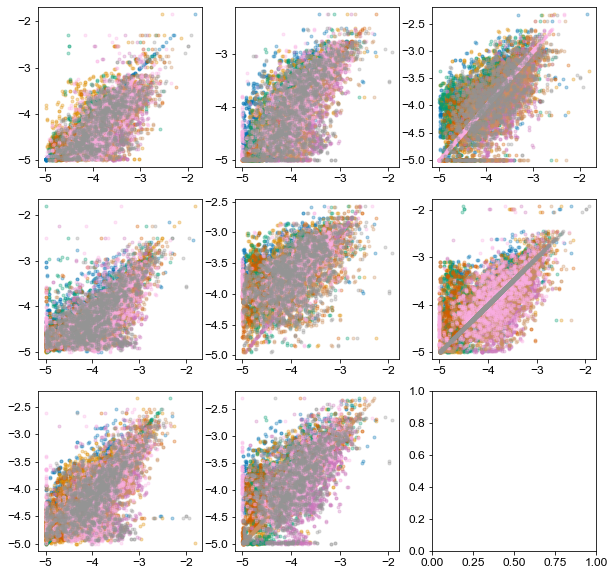

In [87]:
# fig, ax = plt.subplots(nRuns, nRuns, figsize=[20, 20])
fig, ax = plt.subplots(3, 3, figsize=[10, 10])
method = 'RBM'
aggregation = 1
all_connections_tensor = np.zeros((72, 72, len(runs)))
all_connections_array = np.array([])
correlation = np.zeros([nRuns,nRuns])
for k1, run1 in enumerate(runs):
    i_row = k1 % 3
    i_col = int(np.floor(k1 / 3))
    
    for k2, run2 in enumerate(runs):
        key1 = 'run:%s_method:%s_agg:%s'%(run1, method, selected_aggregation)
        key2 = 'run:%s_method:%s_agg:%s'%(run2, method, selected_aggregation)
        connections1 = all_functional_connectivities[key1].flatten()
        connections2 = all_functional_connectivities[key2].flatten()
        mask = all_masks[k1] & all_masks[k2]  # mutual masks
        ax[i_row][i_col].plot(np.log10(connections2[mask] + 1e-5), 
                              np.log10(connections1[mask] + 1e-5), '.', alpha=0.3)
#         ax[i_row][i_col].set_aspect('equal', adjustable='box')
#         ax[i_row][i_col].set_xlim([-5, -1])
#         ax[i_row][i_col].set_ylim([-5, -1])
#         ax[i_row][i_col].set_xlim([0, 0.005])
#         ax[i_row][i_col].set_ylim([0, 0.005])
    all_connections_array = np.concatenate((all_connections_array, connections1))
    all_connections_tensor[:, :, k1] = all_functional_connectivities[key1]

/home/thijs/.conda/envs/py37/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


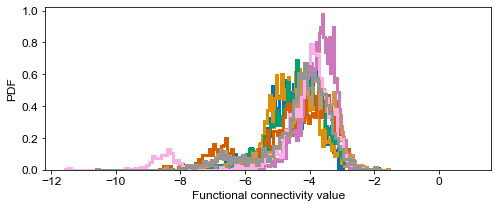

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
for i_fish in range(9):
    tmp_dens = all_connections_tensor[: ,:, i_fish]
    ax.hist(np.log10(tmp_dens[tmp_dens > 0]), bins=100, density=True, histtype='step', linewidth=3);
ax.set_xlabel('Functional connectivity value');
ax.set_ylabel('PDF');

18315 41472
RBM 3219 5184


/home/thijs/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/home/thijs/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


covariance 3219 5184
correlation 3219 5184


(-10, -2)

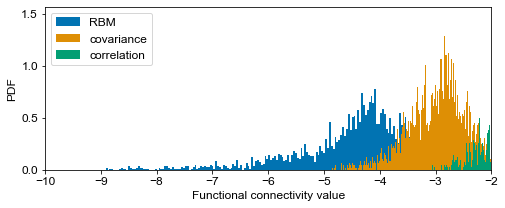

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
# ax.hist(np.sqrt(all_connections_array[all_connections_array > 0]), bins=200, density=True);
ax.set_xlabel('Functional connectivity value');
ax.set_ylabel('PDF');
print(len(all_connections_array[all_connections_array > 0]), len(all_connections_array))

for method in methods:
    tmp_dens = all_averaged_functional_connectivities[f'method:{method}_agg:1'].ravel()
    ax.hist(np.log10(tmp_dens[tmp_dens > 0]), bins=200, density=True, label=method);
    print(method, len(tmp_dens[tmp_dens > 0]), len(tmp_dens))
ax.legend()
ax.set_xlim([-10, -2])

Text(0.5, 1.0, 'correlation')

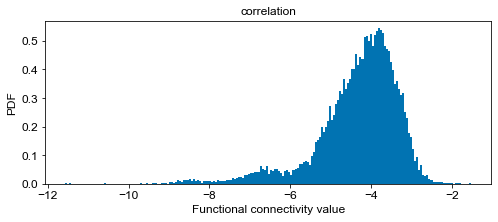

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.hist(np.log10(all_connections_array[all_connections_array > 0]), bins=200, density=True);
ax.set_xlabel('Functional connectivity value');
ax.set_ylabel('PDF');
ax.set_title('correlation')

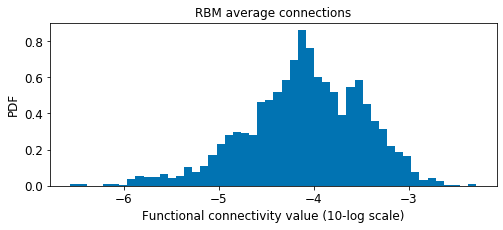

In [192]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.hist(np.log10(all_averaged_functional_connectivities['method:RBM_agg:1'][subset, :][:, subset]).flatten(), bins=50, density=True);
ax.set_xlabel('Functional connectivity value (10-log scale)');
ax.set_ylabel('PDF');
ax.set_title('RBM average connections');

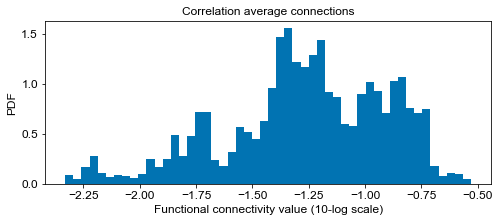

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.hist(np.log10(all_averaged_functional_connectivities['method:correlation_agg:1'][subset, :][:, subset]).flatten(), bins=50, density=True);
ax.set_xlabel('Functional connectivity value (10-log scale)');
ax.set_ylabel('PDF');
ax.set_title('Correlation average connections');

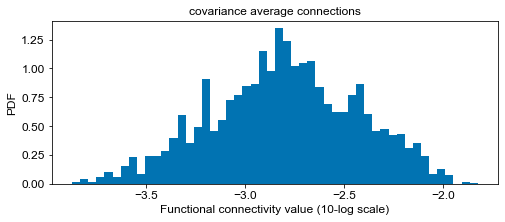

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.hist(np.log10(all_averaged_functional_connectivities['method:covariance_agg:1'][subset, :][:, subset]).flatten(), bins=50, density=True);
ax.set_xlabel('Functional connectivity value (10-log scale)');
ax.set_ylabel('PDF');
ax.set_title('covariance average connections');

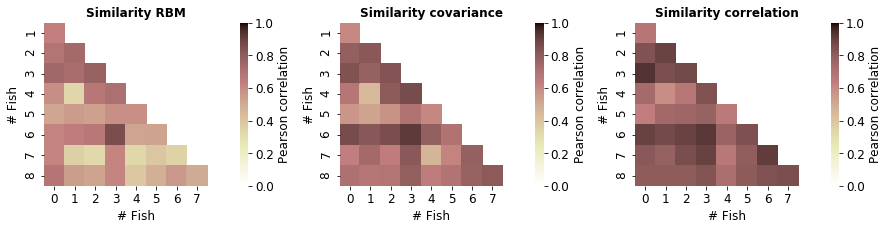

In [7]:
fig = plt.figure(constrained_layout=False, figsize=[15, 3])
ax_sim = {}
for i_plot, plot_name in enumerate(['RBM', 'covariance', 'correlation']):
    ax_sim[i_plot] = plt.subplot(1, 3, 1 + i_plot)
    pf.plot_reproduc_mat(dict_mat=all_correlations, key=plot_name,
                         ax=ax_sim[i_plot])
    ax_sim[i_plot].set_title(f'Similarity {plot_name}', fontdict={'weight': 'bold'})

In [22]:
all_correlations['RBM']['p_vals_pearson'].max()


3.105403941616797e-40

/home/thijs/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


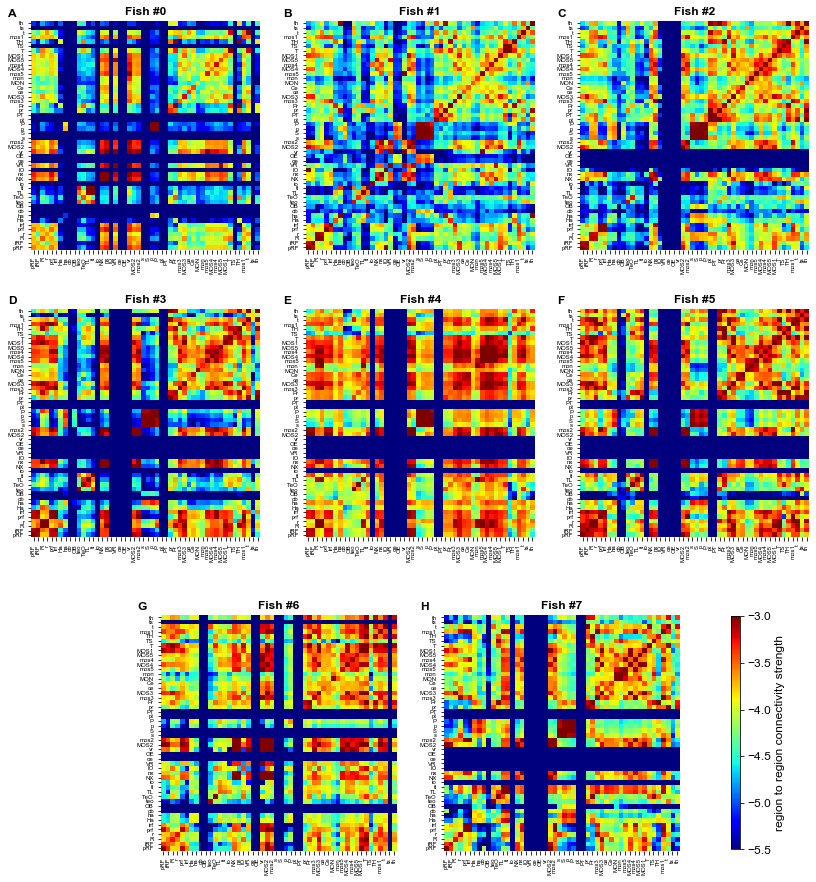

In [188]:
nRuns = len(runs)    
assert runs == all_correlations['RBM']['run_names']
save_fig = True
method = 'RBM'

fig = plt.figure(constrained_layout=False, figsize=[12, 12])
gs_middle_top = fig.add_gridspec(ncols=3, nrows=2, bottom=0.35, top=1, 
                             hspace=0.05, wspace=0.2, left=0.05, right=0.95)
gs_bottom = fig.add_gridspec(ncols=2, nrows=1, bottom=0, top=0.3, 
                             hspace=0.05, wspace=0.2, left=0.2, right=0.8)
gs_cbar = fig.add_gridspec(ncols=1, nrows=1, bottom=0.015, top=0.285, 
                             hspace=0.05, wspace=0.2, left=0.86, right=0.87)
cax=plt.subplot(gs_cbar[0])
label_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
for k, run in enumerate(runs):
    i = k // ncols
    j = k % ncols
    if i <= 1:
        ax_current = plt.subplot(gs_middle_top[i, j])
    else:
        ax_current = plt.subplot(gs_bottom[j])
    index_run = np.where(np.array(all_correlations['RBM']['run_names']) == run)[0]
    assert len(index_run) == 1
    key_matrix = connectivity_key_format.format(
        run=run, method=method, aggregation=selected_aggregation)
    key_correlation = correlation_key_format.format(
        run=run, method=method, aggregation=selected_aggregation, connectivity_type=selected_connectivity_type)
    prediction = all_functional_connectivities[key_matrix]
    prediction_ = prediction.copy()
    prediction_[~all_masks[index_run].reshape([nRegions_baier,nRegions_baier])] = np.nan  # add nans for empty regions

    spearman = all_spearman[key_correlation]  # precomputed correlatoin with Baier 
    pearson = all_pearson[key_correlation]
    ax_current = pf.plot_connectivity_matrix(prediction_, region_names_baier, mini=-5.5, maxi=-3,
                                size=5, ax=ax_current, subset=subset, plot_log=True, scale_limits=True,
                                region_order_dict=kunst_region_order, plot_labels=True,
                                          fill_nans_with_min=True, cbar=(k == 7), cax=cax)
    ax_current.set_title(f'Fish #{index_run[0]}', fontdict={'weight': 'bold'})
    ax_current.text(s=label_list[k], x=54.5, y=-1.5, fontdict={'weight': 'bold', 'size': 12})

plt.tight_layout()
if save_fig:
    fig.savefig('/home/thijs/repos/zf-rbm/figures/sfig_connectivity_all_individuals.pdf', dpi=300)


/home/thijs/repos/zf-rbm/figure_notebooks/plotting_functions.py:517: RuntimeWarning: invalid value encountered in greater
  matrix_use[np.isnan(matrix_use)] = np.nanmin(matrix_use[matrix_use > 0])


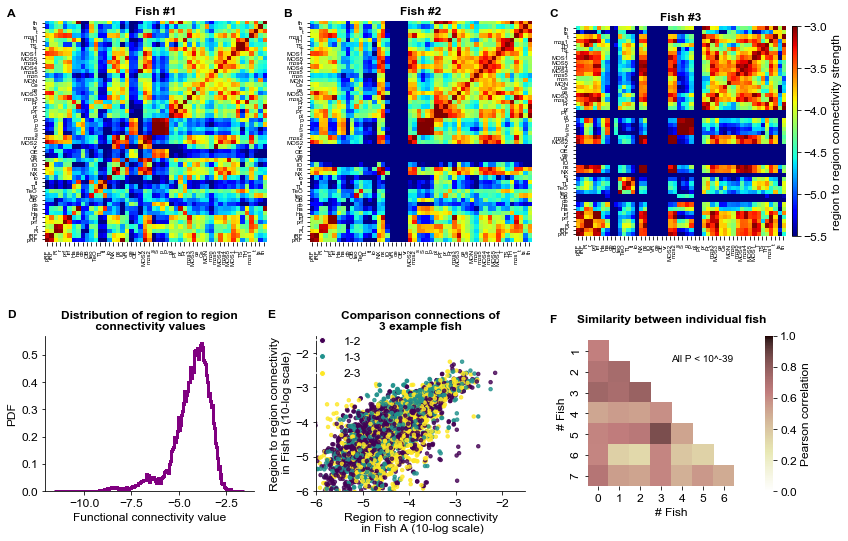

In [171]:
plot_runs = ['20180911_Run01', '20180912_Run01', '20180913_Run01']
save_fig = False
selected_connectivity_type = 'my_new_normalized_by_volume'


fig = plt.figure(constrained_layout=False, figsize=[12, 8])
gs_matrix = fig.add_gridspec(ncols=3, nrows=1, bottom=0.5, top=0.95, 
                             hspace=0.1, wspace=0.2, left=0.05, right=0.92)
gs_stats = fig.add_gridspec(ncols=3, nrows=1, bottom=0.1, top=0.37, 
                             hspace=0.1, wspace=0.3, left=0.05, right=0.92)

ax_mat = {}

for k, run in enumerate(plot_runs):
    ax_mat[k] = fig.add_subplot(gs_matrix[k])
    index_run = np.where(np.array(all_correlations['RBM']['run_names']) == run)[0]
    assert len(index_run) == 1
    key_matrix = connectivity_key_format.format(
        run=run, method='RBM', aggregation=1)
    key_correlation = correlation_key_format.format(
        run=run, method='RBM', aggregation=1, connectivity_type=selected_connectivity_type)
    prediction = all_functional_connectivities[key_matrix]
    prediction_ = prediction.copy()
    prediction_[~all_masks[index_run].reshape([nRegions_baier,nRegions_baier])] = np.nan  # add nans for empty regions

    spearman = all_spearman[key_correlation]  # precomputed correlatoin with Baier 
    pearson = all_pearson[key_correlation]
    if k == 2:
        plot_cbar = True
    else:
        plot_cbar = False
    ax_mat[k] = pf.plot_connectivity_matrix(prediction_, region_names_baier, mini=-5.5, maxi=-3,
                                            size=5, ax=ax_mat[k], subset=subset, plot_log=True, scale_limits=True,
                                            region_order_dict=kunst_region_order, plot_labels=True,
                                            cbar=plot_cbar, fill_nans_with_min=True)
#     ax_mat[k].set_title('Fish #%s , Spearman = %.3f, Pearson = %.3f' % (
#         index_run[0] + 1, spearman, pearson), fontsize=12, fontdict={'weight': 'bold'})
#     ax_mat[k].set_title(run, fontsize=12, fontdict={'weight': 'bold'})
    ax_mat[k].set_title(f'Fish #{index_run[0]}', fontdict={'weight': 'bold'})


ax_dens = fig.add_subplot(gs_stats[0])
ax_dens.hist(np.log10(all_connections_array[all_connections_array > 0]), 
        bins=200, density=True, histtype='step', linewidth=3, color=dr_colors['rbm']);
ax_dens.set_xlabel('Functional connectivity value');
ax_dens.set_ylabel('PDF');
ax_dens.spines['top'].set_visible(False)
ax_dens.spines['right'].set_visible(False)
ax_dens.set_title('Distribution of region to region\n connectivity values', 
                  fontdict={'weight': 'bold'})
ax_scatter = fig.add_subplot(gs_stats[1])
pf.plot_multi_fish_connectivity_scatter(all_connections_tensor=all_connections_tensor, 
                                        fish_combinations=[(1, 2), (1, 3), (2, 3)],
                                        axis_lim=[-6, -1.5], ax=ax_scatter)
ax_scatter.set_title('Comparison connections of\n3 example fish', fontdict={'weight': 'bold'})

ax_corr = fig.add_subplot(gs_stats[2])
pf.plot_reproduc_mat(dict_mat=all_correlations, key='RBM',
                 ax=ax_corr)
ax_corr.set_title('Similarity between individual fish\n', 
                  fontdict={'weight': 'bold'});
sci_not = np.format_float_scientific(all_correlations['RBM']['p_vals_pearson'].max(), precision=3)  # highest P value
sci_exp_ceil = int(sci_not.split('e')[1]) + 1  # round up
ax_corr.text(s=f'All P < 10^{sci_exp_ceil}', x=4, y=2)

ax_mat[0].text(s='A', x=58, y=-1.5, fontdict={'weight': 'bold', 'size': 12})
ax_mat[0].text(s='B', x=-4.4, y=-1.5, fontdict={'weight': 'bold', 'size': 12})
ax_mat[0].text(s='C', x=-64.5, y=-1.5, fontdict={'weight': 'bold', 'size': 12})
ax_mat[0].text(s='D', x=58, y=66.7, fontdict={'weight': 'bold', 'size': 12})
ax_mat[0].text(s='E', x=-0.8, y=66.7, fontdict={'weight': 'bold', 'size': 12})
ax_mat[0].text(s='F', x=-64.5, y=67.7, fontdict={'weight': 'bold', 'size': 12})
if save_fig:
    fig.savefig('/home/thijs/repos/zf-rbm/figures/fig_connectivity_individuals_fill.pdf', dpi=300)


In [33]:
print(all_correlations['RBM']['p_vals_pearson'].max())
sci_not = np.format_float_scientific(all_correlations['RBM']['p_vals_pearson'].max(), precision=3)
sci_exp_ceil = int(sci_not.split('e')[1]) + 1

3.105403941616797e-40


-39

In [236]:
runs

['20180706_Run04',
 '20180911_Run01',
 '20180912_Run01',
 '20180913_Run01',
 '20181218_Run02',
 '20190109_Run04',
 '20181206_Run03',
 '20190102_Run01',
 '20181206_Run05']

(2500,)
1 (2500,)
1 (1346,)
(1346,)
RBM Pearson: 0.3714090252820289 , Spearman:  0.34974924031576504
5.152748299690845e-40
(2500,)
1 (2500,)
1 (1346,)
(1346,)
covariance Pearson: 0.1537066015652907 , Spearman:  0.15361036306629672
1.4784222095644045e-08
(2500,)
1 (2500,)
1 (1346,)
(1346,)
correlation Pearson: 0.22144822285904636 , Spearman:  0.2413498692577241
2.7212037943950296e-19


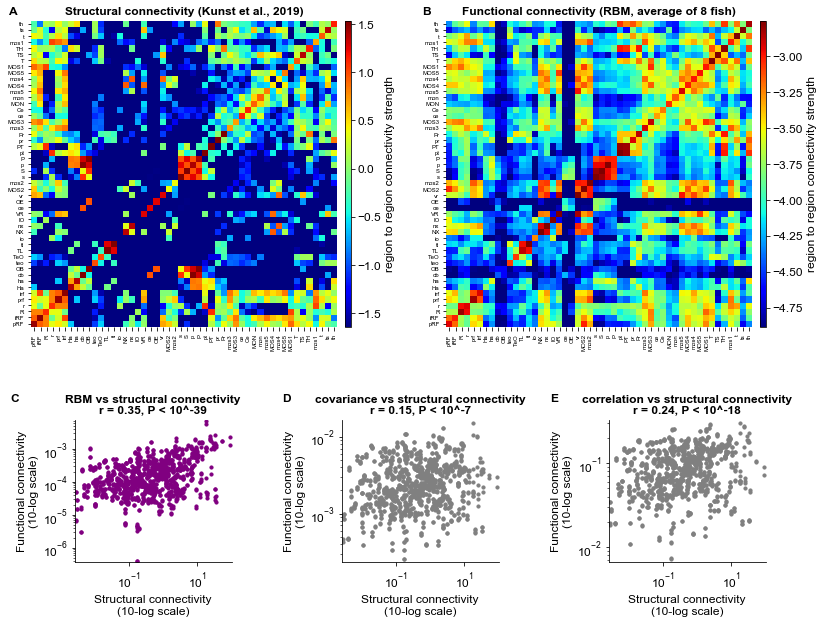

In [163]:
save_fig = True
selected_connectivity_type = 'my_new_normalized_by_volume'

fig = plt.figure(figsize=[12, 9])
gs_matrices = fig.add_gridspec(ncols=2, nrows=1, left=0.05, right=0.9, top=0.95,
                               bottom=0.45, wspace=0.3, hspace=0)
gs_bottom = fig.add_gridspec(ncols=3, nrows=1, left=0.1, right=0.9, top=0.32, bottom=0.1,
                             wspace=0.7)
ax_baier = fig.add_subplot(gs_matrices[0])
ax_rbm = fig.add_subplot(gs_matrices[1])

pf.plot_connectivity_matrix(matrix=all_baier_connectivities[selected_connectivity_type], # + 1e-6, #my_new_normalized_by_volume
                          cbar=True, plot_log=True, scale_limits=True,
                          region_names=region_names_baier, #mini=-3, maxi=2, # mini=-4, maxi=-1,#mini=-3, maxi=2,
                          region_order_dict=kunst_region_order, 
                          reverse_x=True, subset=subset, ax=ax_baier,
                           cmap='jet', fill_zeros_with_min=True)
ax_baier.set_title('Structural connectivity (Kunst et al., 2019)', 
                   fontdict={'weight': 'bold'})

pf.plot_connectivity_matrix(matrix=all_averaged_functional_connectivities['method:RBM_agg:1'], 
                          cbar=True, plot_log=True, #mini=-4.75, maxi=-2.5,
                            region_names=region_names_baier, size=5, scale_limits=True,
                          region_order_dict=kunst_region_order, 
                          reverse_x=True, subset=subset, ax=ax_rbm,
                           cmap='jet')

ax_rbm.set_title(f'Functional connectivity (RBM, average of {len(runs)} fish)', 
                 fontdict={'weight': 'bold'})

ax_comparison = {}
for i_meth, method in enumerate(['RBM', 'covariance', 'correlation']):
    ax_comparison[method] = fig.add_subplot(gs_bottom[i_meth])
    pearson_corr, spearman_corr = pf.plot_funct_vs_struct(struct_mat=all_baier_connectivities[selected_connectivity_type],  # my_new_normalized_by_volume
                            funct_mat=all_averaged_functional_connectivities[f'method:{method}_agg:1'],
                            ax=ax_comparison[method], subset=subset, key=method, title='specific', compute_in_log=True,
                                                         fill_diag=False, filter_zeros=True, set_limits=True)
    
ax_baier.text(s='A', x=53.2, y=-1.5, fontdict={'weight': 'bold', 'size': 12})
ax_rbm.text(s='B', x=53.5, y=-1.5, fontdict={'weight': 'bold', 'size': 12})
ax_baier.text(s='C', x=53, y=61.7, fontdict={'weight': 'bold', 'size': 12})
ax_baier.text(s='D', x=8.5, y=61.7, fontdict={'weight': 'bold', 'size': 12})
ax_baier.text(s='E', x=-35.2, y=61.7, fontdict={'weight': 'bold', 'size': 12})
if save_fig:
    plt.savefig('/home/thijs/repos/zf-rbm/figures/fig_connectivity_structural_comparison.pdf', dpi=300)

1154 zero and 1346 non-zero structural connections
Ks_2sampResult(statistic=0.442350529587635, pvalue=3.6637359812630166e-15)
Ks_2sampResult(statistic=0.45077139788989007, pvalue=3.6637359812630166e-15)
Ks_2sampResult(statistic=0.4669963767089599, pvalue=3.6637359812630166e-15)


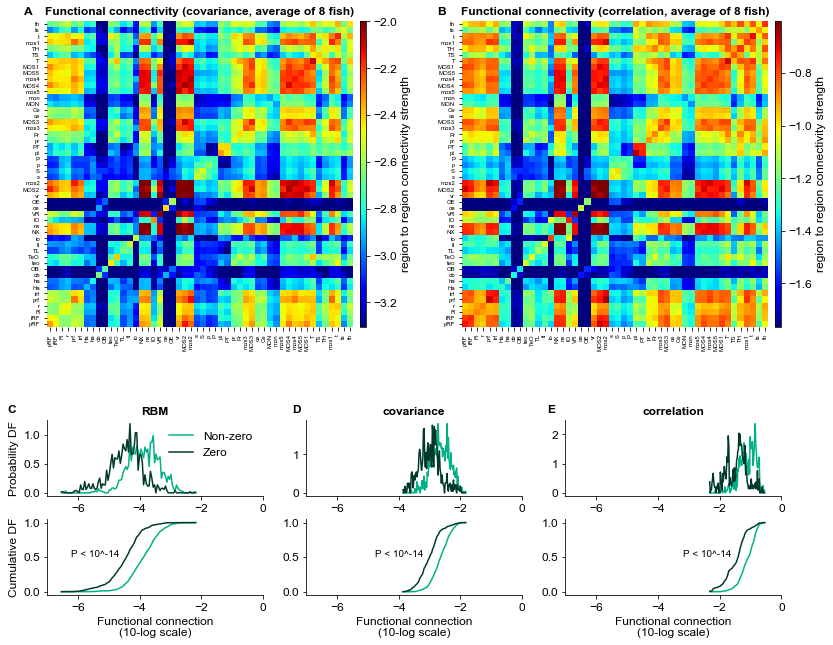

In [240]:
save_fig = False
selected_connectivity_type = 'my_new_normalized_by_volume'

fig = plt.figure(figsize=[12, 9])
gs_matrices = fig.add_gridspec(ncols=2, nrows=1, left=0.05, right=0.9, top=0.95,
                               bottom=0.45, wspace=0.3, hspace=0)
gs_bottom = fig.add_gridspec(ncols=3, nrows=2, left=0.05, right=0.9, top=0.32, bottom=0.05,
                             wspace=0.2, hspace=0.3)
ax_covar = fig.add_subplot(gs_matrices[0])
ax_corr = fig.add_subplot(gs_matrices[1])

pf.plot_connectivity_matrix(matrix=all_averaged_functional_connectivities['method:covariance_agg:1'], # + 1e-6, #my_new_normalized_by_volume
                          cbar=True, plot_log=True, scale_limits=True,
                          region_names=region_names_baier, #mini=-4, maxi=-2,
                          region_order_dict=kunst_region_order, 
                          reverse_x=True, subset=subset, ax=ax_covar,
                           cmap='jet', fill_zeros_with_min=False)
ax_covar.set_title(f'Functional connectivity (covariance, average of {len(runs)} fish)', 
                   fontdict={'weight': 'bold'})

pf.plot_connectivity_matrix(matrix=all_averaged_functional_connectivities['method:correlation_agg:1'], 
                          cbar=True, plot_log=True, #mini=-2, maxi=-0.5,
                            region_names=region_names_baier, size=5, scale_limits=True,
                          region_order_dict=kunst_region_order, 
                          reverse_x=True, subset=subset, ax=ax_corr,
                           cmap='jet')

ax_corr.set_title(f'Functional connectivity (correlation, average of {len(runs)} fish)', 
                 fontdict={'weight': 'bold'})

## Plot distr of funct connections of zero Baier vs nz Baier
struct_mat = all_baier_connectivities[selected_connectivity_type][subset, :][:, subset]  # subset = min # neurons in funct conn matrix
inds_struct_zero = np.where(struct_mat == 0)
inds_struct_nz = np.where(struct_mat != 0)

assert inds_struct_nz[0].shape[0] + inds_struct_zero[0].shape[0] == struct_mat.size  
print(f'{len(inds_struct_zero[0])} zero and {len(inds_struct_nz[0])} non-zero structural connections')

ax = {0: {}, 1: {}}
funct_nz = {}
funct_zero = {}
pdf_nz, pdf_zero = {}, {}
cdf_nz, cdf_zero = {}, {}
colour_nz = '#00b188'
colour_zero = '#00392c'
for i_plot, method in enumerate(['RBM', 'covariance', 'correlation']):
    ax[0][i_plot] = plt.subplot(gs_bottom[0, i_plot])
    ax[1][i_plot] = plt.subplot(gs_bottom[1, i_plot])
    funct_mat = all_averaged_functional_connectivities[f'method:{method}_agg:1'][subset, :][:, subset]
    assert np.sum(funct_mat == 0) == 0  # no zeros, so log scale doesn't throw any issues
    funct_mat = np.log10(funct_mat)  # show in log scale 
    funct_nz[method] = funct_mat[inds_struct_nz]
    funct_zero[method] = funct_mat[inds_struct_zero]
    ks_test = scipy.stats.ks_2samp(funct_nz[method].copy(), 
                                       funct_zero[method].copy(), mode='exact')
    sci_not = np.format_float_scientific(ks_test[1], precision=3)
    sci_exp_ceil = int(sci_not.split('e')[1]) + 1
    print(ks_test)
#     print(kstest(funct_nz[method], funct_zero[method]))
    
    plot_bins = np.linspace(np.min(funct_mat[~np.isnan(funct_mat)]), 
                            np.max(funct_mat[~np.isnan(funct_mat)]), 100)  # fix bins 

    pdf_nz[method], plot_bins = np.histogram(funct_nz[method], bins=plot_bins, density=True)
    pdf_zero[method], plot_bins = np.histogram(funct_zero[method], bins=plot_bins, density=True)
    
    cdf_nz[method] = np.cumsum(pdf_nz[method]) / np.max(np.cumsum(pdf_nz[method]))
    cdf_zero[method] = np.cumsum(pdf_zero[method]) / np.max(np.cumsum(pdf_zero[method]))

    plot_bins_centered = (plot_bins[1:] + plot_bins[:-1]) / 2 
    ax[0][i_plot].plot(plot_bins_centered, pdf_nz[method], 
                       label='Non-zero', c=colour_nz)
    ax[0][i_plot].plot(plot_bins_centered, pdf_zero[method], 
                       label='Zero', c=colour_zero)
    
    ax[1][i_plot].plot(plot_bins_centered, 
                       cdf_nz[method], 
                       label='Non-zero', c=colour_nz)
    ax[1][i_plot].plot(plot_bins_centered, 
                       cdf_zero[method], 
                       label='Zero', c=colour_zero)
    
    ax[1][i_plot].text(s=f'P < 10^{sci_exp_ceil}', x=plot_bins_centered[int(np.argmin(np.abs(cdf_zero[method] - 0.5)))] - 0.2, y=0.5,
                       fontdict={'ha': 'right'})
    ax[0][i_plot].set_title(method, fontdict={'weight': 'bold'})
    ax[1][i_plot].set_xlabel('Functional connection\n(10-log scale)')
    ax[0][i_plot].set_xlim([-7, 0])
    ax[1][i_plot].set_xlim([-7, 0])
    for ii in [0, 1]:
        for side in ['top', 'right']:
            ax[ii][i_plot].spines[side].set_visible(False)
ax[0][0].set_ylabel('Probability DF');
ax[1][0].set_ylabel('Cumulative DF');
ax[0][0].legend(frameon=False)

ax_covar.text(s='A', x=53.2, y=-1.5, fontdict={'weight': 'bold', 'size': 12})
ax_corr.text(s='B', x=53.5, y=-1.5, fontdict={'weight': 'bold', 'size': 12})
ax_covar.text(s='C', x=56, y=63.5, fontdict={'weight': 'bold', 'size': 12})
ax_covar.text(s='D', x=9.5, y=63.5, fontdict={'weight': 'bold', 'size': 12})
ax_covar.text(s='E', x=-32.2, y=63.5, fontdict={'weight': 'bold', 'size': 12})
fig.align_ylabels(axs=[ax[0][0], ax[1][0]])

if save_fig:
    plt.savefig('/home/thijs/repos/zf-rbm/figures/sfig_connectivity_covar_corr.pdf', dpi=300)

In [234]:
cdf_zero[method] 

array([0.00693241, 0.00693241, 0.00953206, 0.01126516, 0.01733102,
       0.02599653, 0.03812825, 0.04592721, 0.05025997, 0.05372617,
       0.05719237, 0.05719237, 0.05979203, 0.06412478, 0.06672444,
       0.07279029, 0.07279029, 0.0745234 , 0.0745234 , 0.08752166,
       0.09358752, 0.09965338, 0.10138648, 0.1135182 , 0.12045061,
       0.13171577, 0.14818024, 0.16031196, 0.17157712, 0.18024263,
       0.19670711, 0.21923744, 0.23830156, 0.27383016, 0.30329289,
       0.30762565, 0.31715771, 0.32322357, 0.32928943, 0.33362218,
       0.34142114, 0.35268631, 0.36741768, 0.37435009, 0.38994801,
       0.39774697, 0.40727903, 0.4220104 , 0.44280763, 0.4644714 ,
       0.49046794, 0.51733102, 0.55459272, 0.58405546, 0.62045061,
       0.64991334, 0.68024263, 0.70970537, 0.73310225, 0.75476603,
       0.77469671, 0.79289428, 0.81802426, 0.847487  , 0.85875217,
       0.87521664, 0.88561525, 0.89168111, 0.89688042, 0.89948007,
       0.90381282, 0.90641248, 0.90901213, 0.91421144, 0.92287

In [228]:
## An additional KS test:
## ( because the scipy.stats gives the same P value for all 3, for some reason)
## computing with this one gives the sam statisitcs, but lower P values which slightly difer. I therefore think its a rounding error so its fine

#https://gist.github.com/devries/11405101
import math
def kstest(datalist1, datalist2):
    n1 = len(datalist1)
    n2 = len(datalist2)
    datalist1.sort()
    datalist2.sort()

    j1 = 0
    j2 = 0
    d = 0.0
    fn1=0.0
    fn2=0.0
    while j1<n1 and j2<n2:
        d1 = datalist1[j1]
        d2 = datalist2[j2]
        if d1 <= d2:
            fn1 = (float(j1)+1.0)/float(n1)
            j1+=1
        if d2 <= d1:
            fn2 = (float(j2)+1.0)/float(n2)
            j2+=1
        dtemp = math.fabs(fn2-fn1)
        if dtemp>d:
            d=dtemp

    ne = float(n1*n2)/float(n1+n2)
    nesq = math.sqrt(ne)
    prob = ksprob((nesq+0.12+0.11/nesq)*d)
    return d,prob,ne

def ksprob(alam):
    fac = 2.0
    sum = 0.0
    termbf = 0.0

    a2 = -2.0*alam*alam
    for j in range(1,101):
        term = fac*math.exp(a2*j*j)
        sum += term
        if math.fabs(term) <= 0.001*termbf or math.fabs(term) <= 1.0e-8*sum:
            return sum
        fac = -fac
        termbf = math.fabs(term)

    return 1.0

In [217]:
method = 'correlation'
scipy.stats.ks_2samp(funct_nz[method], 
                     funct_zero[method])
# pdf_nz[method]

Ks_2sampResult(statistic=0.4669963767089599, pvalue=3.6637359812630166e-15)